#**LangChain**

LangChain is a framework for developing applications powered by language models.

- GitHub: https://github.com/hwchase17/langchain
- Docs: https://python.langchain.com/en/latest/index.html

### Overview:
- Installation
- LLMs
- Prompt Templates
- Chains
- Agents and Tools
- Memory
- Document Loaders
- Indexes

#**Step 01: Installation**

https://python.langchain.com/docs/integrations/platforms/openai

In [4]:
!pip install langchain -q
!pip install langchain-openai -q
!pip install openai -q

#**Step 02: Setup the Environment**

In [5]:
import os
from openai import OpenAI



In [17]:
# os.environ['OPENAI_API_KEY'] = "sk-"

# os.environ["HUGGINGFACEHUB_API_TOKEN"] = "hf_"

from google.colab import userdata
GOOGLE_API_KEY           = userdata.get('GOOGLE_API_KEY')
OPENAI_API_KEY           = userdata.get('OPENAI_API_KEY')
HF_TOKEN                 = userdata.get('HF_TOKEN')
HUGGINGFACEHUB_API_TOKEN = userdata.get('HUGGINGFACEHUB_API_TOKEN')

##**Step 03: Large Language Models**

The basic building block of LangChain is a Large Language Model which takes text as input and generates more text

Suppose we want to generate a company name based on the company description, so we will first initialize an OpenAI wrapper. In this case, since we want the output to be more random, we will intialize our model with high temprature.

The temperature parameter adjusts the randomness of the output. Higher values like 0.7 will make the output more random, while lower values like 0.2 will make it more focused and deterministic.

temperature value--> how creative we want our model to be

0 ---> temperature it means model is  very safe it is not taking any bets.

1 --> it will take risk it might generate wrong output but it is very creative

A generic interface for all LLMs. See all LLM providers: https://python.langchain.com/en/latest/modules/models/llms/integrations.html

#**Open AI**

#**Example 1**

In [ ]:

client = OpenAI(api_key=OPENAI_API_KEY )

response = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": "Who won the world series in 2020?"},
    {"role": "assistant", "content": "The Los Angeles Dodgers won the World Series in 2020."},
    {"role": "user", "content": "Where was it played?"}
  ]
)

In [ ]:
response

ChatCompletion(id='chatcmpl-8hVuzpMM7wXDsvsgKPpzA3Sh5L3mj', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='The World Series in 2020 was played in Arlington, Texas at the Globe Life Field, which was the new home stadium for the Texas Rangers.', role='assistant', function_call=None, tool_calls=None))], created=1705381489, model='gpt-3.5-turbo-0613', object='chat.completion', system_fingerprint=None, usage=CompletionUsage(completion_tokens=30, prompt_tokens=53, total_tokens=83))

# import required Library

In [12]:
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
from langchain_openai import OpenAI

# from langchain.llms import OpenAI
# The class `langchain_community.llms.openai.OpenAI` was deprecated in langchain-community 0.0.10 and will be removed in 0.2.0.
# An updated version of the class exists in the langchain-openai package and should be used instead.
# To use it run `pip install -U langchain-openai` and import as `from langchain_openai import OpenAI`

In [8]:
# from langchain.llms import OpenAI
# llm = OpenAI(temperature=0.9)
llm = OpenAI(openai_api_key=OPENAI_API_KEY, temperature=0.9)

And now we will pass in text and get  predictions

In [9]:
text="What would be a good company name for a company that makes colorful socks?"

In [ ]:
print(llm.invoke(text))

In [ ]:
print(llm(text))



Festive Sock Co.


#**Example 2**

In [13]:
llm = OpenAI(openai_api_key=OPENAI_API_KEY, temperature=0.9)
name = llm.predict("I want to open a restaurant for Chinese food. Suggest a fency name for this.")
print(name)



"Dragon's Palace"


In [ ]:
response=llm("I want to open a restaurant for Chinese food. Suggest a fency name for this.")
print(response)



The Imperial Wok 


#**Hugging Face**

#**Example 1**

In [14]:
!pip install huggingface_hub -q

In [25]:
from langchain import HuggingFaceHub
from huggingface_hub import InferenceApi

In [29]:
# https://huggingface.co/google/flan-t5-xl
# https://huggingface.co/google/flan-t5-large


# llm = HuggingFaceHub(repo_id="google/flan-t5-large", model_kwargs={"temperature":0, "max_length":64}, huggingfacehub_api_token = HUGGINGFACEHUB_API_TOKEN)
# FutureWarning: 'InferenceApi' (from 'huggingface_hub.inference_api') is deprecated


llm = InferenceApi(repo_id="google/flan-t5-large", task="text2text-generation", token = HUGGINGFACEHUB_API_TOKEN)


In [31]:

prompt = "translate English to German: How old are you?"
response = llm(prompt)
print(response)

[{'generated_text': 'Wie alte sind Sie?'}]


In [33]:
prompt = "Tell me about yourself"
# response = llm(prompt)
response = llm(prompt)
print(response)

[{'generated_text': 'I am a sculptor and sculptor of stone.'}]


#**Example 2**

In [34]:

prompt = "I want to open a restaurant for Chinese food. Suggest a fency name for this."

response = llm(prompt)
print(response)


[{'generated_text': 'Chinese restaurant'}]


##**Step 04: Prompt Templates**

Currently in the above applications we are writing an entire prompt, if you are creating a user directed application then this is not an ideal case

LangChain faciliates prompt management and optimization.

Normally when you use an LLM in an application, you are not sending user input directly to the LLM. Instead, you need to take the user input and construct a prompt, and only then send that to the LLM.

In many Large Language Model applications we donot pass the user input directly to the Large Language Model, we add the user input to a large piece of text called prompt template

#**Example 1**

In [35]:
from langchain.prompts import PromptTemplate

In [36]:
llm = OpenAI(openai_api_key=OPENAI_API_KEY, temperature=0.9)

In [38]:
prompt_template_name = PromptTemplate(
    input_variables =['cuisine'],
    template = "I want to open a restaurant for {cuisine} food. Suggest a fency name for this."
)
prompt = prompt_template_name.format(cuisine="Italian")
print(prompt)

I want to open a restaurant for Italian food. Suggest a fency name for this.


#**Example 2**

In [40]:

promptT = PromptTemplate.from_template("What is a good name for a company that makes {product}")
prompt = promptT.format(product="colorful socks")
print(prompt)

What is a good name for a company that makes colorful socks


In [42]:
response = llm.invoke(prompt)
print(response)



Rainbow Socks Co. or Bright Feet Co.


##**Step 05: Chains**

Combine LLMs and Prompts in multi-step workflows

Now as we have the  **model**:


  llm = OpenAI(temperature=0.9)


and the **Prompt Template**:

prompt = PromptTemplate.from_template("What is a good name for a company that makes {product}")


prompt.format(product="colorful socks")


Now using Chains we will link together model and the PromptTemplate and other Chains

The simplest and most common type of Chain is LLMChain, which passes the input first to Prompt Template and then to Large Language Model

LLMChain is responsible to execute the PromptTemplate, For every PromptTemplate we will specifically have an LLMChain

#**Example 1**

In [43]:
from langchain_openai import OpenAI
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain

llm = OpenAI(openai_api_key=OPENAI_API_KEY, temperature=0.9)

Whatever input text i am giving that will get assigned to this particular variable that is **product**

In [48]:
promptT = PromptTemplate.from_template("What is a good name for a company that makes {product}")
chain = LLMChain(llm=llm, prompt=promptT)
response= chain.invoke("colorful socks")
print(response)

{'product': 'colorful socks', 'text': '\n\nRainbow Threads Footwear Co.'}


#**Example 2**

In [49]:
prompt_template_name = PromptTemplate(
    input_variables =['cuisine'],
    template = "I want to open a restaurant for {cuisine} food. Suggest a fency name for this."
)

In [51]:

chain = LLMChain(llm=llm, prompt=prompt_template_name)
response=chain.invoke("Mexican")
print(response)

{'cuisine': 'Mexican', 'text': '\n"El Sabor de México" \n'}


In [52]:
chain = LLMChain(llm=llm, prompt=prompt_template_name, verbose=True)
response=chain.invoke("Indian")
print(response)



> Entering new LLMChain chain...
Prompt after formatting:
I want to open a restaurant for Indian food. Suggest a fency name for this.

> Finished chain.
{'cuisine': 'Indian', 'text': '\n\n"Spice Palace: A Taste of India"'}


#**Can we combine Multiple PromptTemplates, We will try to combine Multiple PromptTemplates**

#**The output from the first PromptTemplate is passed to the next PromptTemplate as input**

#**To comine the Chain and  to set a sequence for that we use SimpleSequentialChain**

##**Simple Sequential Chain**

In [53]:
from langchain_openai import OpenAI
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain

llm = OpenAI(openai_api_key=OPENAI_API_KEY, temperature=0.6)



prompt_template_name = PromptTemplate(
    input_variables =['cuisine'],
    template = "I want to open a restaurant for {cuisine} food. Suggest a fency name for this."
)

name_chain = LLMChain(llm=llm, prompt=prompt_template_name)

prompt_template_items = PromptTemplate(
    input_variables = ['restaurant_name'],
    template="""Suggest some menu items for {restaurant_name}"""
)

food_items_chain = LLMChain(llm=llm, prompt = prompt_template_items)

In [54]:
from langchain.chains import SimpleSequentialChain


chain = SimpleSequentialChain(chains = [name_chain, food_items_chain])

content = chain.invoke("Indian")
print(content)

{'input': 'Indian', 'output': '\n\n1. Spicy Chicken Tikka Masala \n2. Lamb Vindaloo \n3. Vegetable Samosas \n4. Tandoori Shrimp \n5. Aloo Gobi (potatoes and cauliflower in a spicy tomato sauce) \n6. Chana Masala (chickpea curry) \n7. Palak Paneer (spinach and cheese curry) \n8. Garlic Naan bread \n9. Tandoori Chicken \n10. Mango Lassi (yogurt drink) \n11. Vegetable Biryani \n12. Chicken Korma \n13. Dal Makhani (creamy lentil dish) \n14. Aloo Paratha (potato-stuffed flatbread) \n15. Gulab Jamun (fried milk balls in syrup)'}


In [55]:
content

{'input': 'Indian',
 'output': '\n\n1. Spicy Chicken Tikka Masala \n2. Lamb Vindaloo \n3. Vegetable Samosas \n4. Tandoori Shrimp \n5. Aloo Gobi (potatoes and cauliflower in a spicy tomato sauce) \n6. Chana Masala (chickpea curry) \n7. Palak Paneer (spinach and cheese curry) \n8. Garlic Naan bread \n9. Tandoori Chicken \n10. Mango Lassi (yogurt drink) \n11. Vegetable Biryani \n12. Chicken Korma \n13. Dal Makhani (creamy lentil dish) \n14. Aloo Paratha (potato-stuffed flatbread) \n15. Gulab Jamun (fried milk balls in syrup)'}

#**There is a issue with SimpleSequentialChain it only shows last input information**

#**To show the entire information i will use SequentialChain**

##**Sequential Chain**

In [56]:
llm = OpenAI(openai_api_key=OPENAI_API_KEY, temperature=0.7)

prompt_template_name = PromptTemplate(
    input_variables =['cuisine'],
    template = "I want to open a restaurant for {cuisine} food. Suggest a fency name for this."
)

name_chain =LLMChain(llm=llm, prompt=prompt_template_name, output_key="restaurant_name")

In [57]:
llm1 = OpenAI(openai_api_key=OPENAI_API_KEY, temperature=0.6)

prompt_template_items = PromptTemplate(
    input_variables = ['restaurant_name'],
    template="Suggest some menu items for {restaurant_name}."
)

food_items_chain =LLMChain(llm=llm1, prompt=prompt_template_items, output_key="menu_items")

In [58]:
from langchain.chains import SequentialChain

chain = SequentialChain(
    chains = [name_chain, food_items_chain],
    input_variables = ['cuisine'],
    output_variables = ['restaurant_name', "menu_items"]
)

In [59]:
response = chain.invoke({"cuisine": "Indian"})
print(response)

{'cuisine': 'Indian', 'restaurant_name': '\n\n"Taj Mahal Bistro" ', 'menu_items': '\n\n1. Tandoori Chicken Tikka: Marinated chicken pieces cooked in a clay oven and served with a side of mint chutney.\n2. Vegetable Samosas: Crispy fried pastries filled with spiced potatoes and peas, served with tamarind chutney.\n3. Lamb Rogan Josh: Slow-cooked lamb in a rich tomato-based gravy flavored with aromatic spices.\n4. Palak Paneer: Creamy spinach and cottage cheese curry, a popular vegetarian dish.\n5. Butter Chicken: Tender chicken pieces cooked in a creamy tomato-based sauce, served with naan bread.\n6. Biryani: Fragrant basmati rice cooked with spices and your choice of chicken, lamb, or vegetables.\n7. Dal Makhani: Slow-cooked black lentils in a creamy tomato and butter sauce.\n8. Garlic Naan: Traditional Indian flatbread topped with garlic and butter, perfect for dipping in curries.\n9. Malai Kofta: Vegetable and cheese balls served in a rich and creamy cashew nut gravy.\n10. Mango Lass

In [60]:
response

{'cuisine': 'Indian',
 'restaurant_name': '\n\n"Taj Mahal Bistro" ',
 'menu_items': '\n\n1. Tandoori Chicken Tikka: Marinated chicken pieces cooked in a clay oven and served with a side of mint chutney.\n2. Vegetable Samosas: Crispy fried pastries filled with spiced potatoes and peas, served with tamarind chutney.\n3. Lamb Rogan Josh: Slow-cooked lamb in a rich tomato-based gravy flavored with aromatic spices.\n4. Palak Paneer: Creamy spinach and cottage cheese curry, a popular vegetarian dish.\n5. Butter Chicken: Tender chicken pieces cooked in a creamy tomato-based sauce, served with naan bread.\n6. Biryani: Fragrant basmati rice cooked with spices and your choice of chicken, lamb, or vegetables.\n7. Dal Makhani: Slow-cooked black lentils in a creamy tomato and butter sauce.\n8. Garlic Naan: Traditional Indian flatbread topped with garlic and butter, perfect for dipping in curries.\n9. Malai Kofta: Vegetable and cheese balls served in a rich and creamy cashew nut gravy.\n10. Mango La

##**Step 06. Agents and Tools**

Agents involve an LLM making decisions about which Actions to take, taking that Action, seeing an Observation, and repeating that until done.


When used correctly agents can be extremely powerful. In order to load agents, you should understand the following concepts:

- Tool: A function that performs a specific duty. This can be things like: Google Search, Database lookup, Python REPL, other chains.
- LLM: The language model powering the agent.
- Agent: The agent to use.


https://python.langchain.com/docs/modules/agents/agent_types/

Agent is a very powerful concept in LangChain

For example I have to travel from Dubai to Canada, I type this in ChatGPT



> Give me  two flight options from Dubai to Canada on September 1, 2023 | ChatGPT will not be able to answer because has knowledge till
September 2021



> ChatGPT plus has Expedia Plugin, if we enable this plugin it will go to Expedia Plugin and will try to pull information about Flights & it will show the information

#**What exactly happens when we try to enable this plugin**

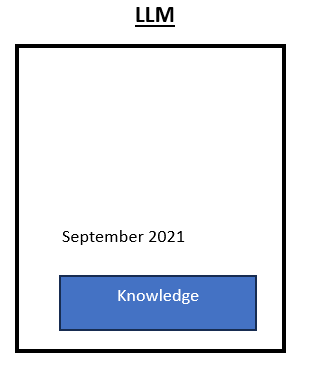

When we think about LLM. Many people think that it is just a knowledge engine, it has knowledge and it will try to give answer based on that knowledge but the knowledge is only limited to September 2021. The think that most people missout is that Large Lanaguage Model has a reasoning engine, and using that reasoning engine it can figure out when someone types this type of Question


Give me  two flight options from Dubai to Canada on September 1, 2023


As a human we go to Expedia as we have a reasoning engine in our brain.

LLM has a reasoning engine as well, so it will figure out the Source, Destination, Date and it will call Expedia Plugin and it will return response back.

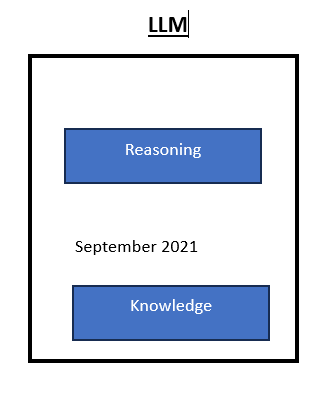

#**How much is US GDP in 2022? plus 5**





As LLM has a reasoning engine to answer that question it will go to Google Search Tool, it will find that answer and then it will use Math Tool and do plus 5

#**An agent has access to a suite of tools, and determines which ones to use depending on the user input.**

#Agent will conenct with external tools and it will use LLM reasoning capabilities

#All the tools like Google Search Tool and Math Tool are available as part of LangChain and you can configure  agent, so agent is nothing but using all these tools and LLM reasoning capabilities to perform a given task  

#To access Google Search Results in Real Time we use serpapi

#### serpapi and llm-math tool

If you're using a text LLM, first try zero-shot-react-description, aka. the MRKL agent for LLMs.


If you're using a Chat Model, try chat-zero-shot-react-description, aka. the MRKL agent for Chat Models.


If you're using a Chat Model and want to use memory, try chat-conversational-react-description, the Conversational agent.


If you have a complex task that requires many steps and you're interested in experimenting with a new type of agent, try the Plan-and-Execute agent.

In [61]:
!pip install google-search-results -q


  Preparing metadata (setup.py) ... done


SerpApi is a real-time API to access Google search results.

In [81]:

# os.environ['SERPAPI_API_KEY'] = 'c'
# os.environ['OPENAI_API_KEY'] = 'sk-'


SERPAPI_API_KEY          = userdata.get('SERPAPI_API_KEY')


In [71]:
from langchain_community.utilities import SerpAPIWrapper

In [77]:
search = SerpAPIWrapper(serpapi_api_key = SERPAPI_API_KEY)
result = search.run("Obama's first name?")
print(result)


Barack Hussein Obama II


In [78]:
from langchain.agents import AgentType, initialize_agent, load_tools
from langchain_community.utilities import SerpAPIWrapper
from langchain_openai import OpenAI

llm = OpenAI(openai_api_key=OPENAI_API_KEY, temperature=0)

In [82]:
tools = load_tools(["serpapi"], llm=llm, serpapi_api_key=SERPAPI_API_KEY)

In [84]:
#Google Search API
# The tools we'll give the Agent access to. Note that the 'llm-math' tool uses an LLM, so we need to pass that in.
tools = load_tools(["serpapi", "llm-math"], llm=llm, serpapi_api_key=SERPAPI_API_KEY)

# Finally, let's initialize an agent with the tools, the language model, and the type of agent we want to use.
# If you're using a text LLM, first try zero-shot-react-description, aka. the MRKL agent for LLMs.
agent = initialize_agent(tools, llm, agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION, verbose=True)

# Let's test it out!
agent.invoke("What was the GDP of US in 2022 + 5?")



> Entering new AgentExecutor chain...
 I should use a calculator to solve this math problem.
Action: Calculator
Action Input: 2022 + 5
Observation: Answer: 2027
Thought: I now know the GDP of US in 2022 + 5 is 2027.
Final Answer: 2027

> Finished chain.


{'input': 'What was the GDP of US in 2022 + 5?', 'output': '2027'}

In [85]:
agent.invoke("What was the GDP of US in 2022 + 5?")



> Entering new AgentExecutor chain...
 I should use a calculator to solve this math problem.
Action: Calculator
Action Input: 2022 + 5
Observation: Answer: 2027
Thought: I now know the GDP of US in 2022 + 5 is 2027.
Final Answer: 2027

> Finished chain.


{'input': 'What was the GDP of US in 2022 + 5?', 'output': '2027'}

#### Wikipedia and llm-math tool

In [86]:
!pip install wikipedia -q

  Preparing metadata (setup.py) ... done


In [87]:
# install this package: pip install wikipedia

# The tools we'll give the Agent access to. Note that the 'llm-math' tool uses an LLM, so we need to pass that in.
tools = load_tools(["wikipedia", "llm-math"], llm=llm)

# Finally, let's initialize an agent with the tools, the language model, and the type of agent we want to use.
agent = initialize_agent(tools,
                        llm,
                        agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
                        verbose=True
                    )

# Let's test it out!
agent.run("In what year was the film Departed with Leopnardo Dicaprio released? What is this year raised to the 0.43 power?")



> Entering new AgentExecutor chain...
 I should use Wikipedia to find the release year of the film and then use a calculator to raise it to the 0.43 power.
Action: Wikipedia
Action Input: Departed

/usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')



Observation: Page: The Departed
Summary: The Departed is a 2006 American crime thriller film directed by Martin Scorsese and written by William Monahan. It is both a remake of the 2002 Hong Kong film Infernal Affairs and also loosely based on the real-life Boston Winter Hill Gang; the character Colin Sullivan is based on the corrupt FBI agent John Connolly, while the character Frank Costello is based on Irish-American gangster and crime boss Whitey Bulger. The film stars Leonardo DiCaprio, Matt Damon, Jack Nicholson, and Mark Wahlberg, with Martin Sheen, Ray Winstone, Vera Farmiga, Alec Baldwin, Anthony Anderson and James Badge Dale in supporting roles.
The film takes place in Boston and the surrounding metro area, primarily in the South Boston neighborhood. Irish Mob boss Frank Costello (Nicholson) plants Colin Sullivan (Damon) as a spy within the Massachusetts State Police; simultaneously, the police assign undercover state trooper Billy Costigan (DiCaprio) to infiltrate Costello's 

'26.30281917656938'

In [88]:
llm = OpenAI(openai_api_key=OPENAI_API_KEY, temperature=0)

# The tools we'll give the Agent access to. Note that the 'llm-math' tool uses an LLM, so we need to pass that in.
tools = load_tools(["wikipedia" ], llm=llm)

# Finally, let's initialize an agent with the tools, the language model, and the type of agent we want to use.
agent = initialize_agent(tools,
                        llm,
                        agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
                        verbose=True
                    )

# Let's test it out!
result = agent.invoke("what is Coronavirus disease 2019 and Symptoms and signs, Complications")
print(result)



> Entering new AgentExecutor chain...
 I should use Wikipedia to find information about Coronavirus disease 2019 and its symptoms, signs, and complications
Action: Wikipedia
Action Input: Coronavirus disease 2019
Observation: Page: COVID-19
Summary: Coronavirus disease 2019 (COVID-19) is a contagious disease caused by the virus SARS-CoV-2. The first known case was identified in Wuhan, China, in December 2019. The disease quickly spread worldwide, resulting in the COVID-19 pandemic.
The symptoms of COVID‑19 are variable but often include fever, cough, headache, fatigue, breathing difficulties, loss of smell, and loss of taste. Symptoms may begin one to fourteen days after exposure to the virus. At least a third of people who are infected do not develop noticeable symptoms. Of those who develop symptoms noticeable enough to be classified as patients, most (81%) develop mild to moderate symptoms (up to mild pneumonia), while 14% develop severe symptoms (dyspnea, hypoxia, or more than 50

In [89]:
result['input']

'what is Coronavirus disease 2019 and Symptoms and signs, Complications'

In [90]:
result['output']

'The Coronavirus disease 2019 (COVID-19) is a contagious disease caused by the virus SARS-CoV-2. Its symptoms include fever, cough, headache, fatigue, breathing difficulties, loss of smell, and loss of taste. Complications can include severe respiratory illness, organ damage, and long-term effects. The COVID-19 pandemic is a global pandemic caused by the spread of the virus, with over 712 million cases and 6.2 million confirmed deaths as of January 2024. Prevention measures include vaccination, physical distancing, and wearing masks, while treatments include antiviral drugs and symptom control.'

##**Step 07: Memory**

Chatbot application like ChatGPT, you will notice that it remember past information

In [91]:
llm = OpenAI(openai_api_key=OPENAI_API_KEY, temperature=0.9)

In [ ]:
from langchain.prompts import PromptTemplate

prompt_template_name = PromptTemplate(
    input_variables =['cuisine'],
    template = "I want to open a restaurant for {cuisine} food. Suggest a fency name for this."
)

In [ ]:
from langchain.chains import LLMChain

chain = LLMChain(llm=llm,prompt=prompt_template_name)
name = chain.run("Mexican")
print(name)



Mexicali Cantina


In [ ]:
name = chain.run("Indian")
print(name)



"Spice of India"


In [92]:
chain.memory

In [93]:
type(chain.memory)

NoneType

##**ConversationBufferMemory**

We can attach memory to remember all previous conversation

In [94]:
from langchain.memory import ConversationBufferMemory

memory_b = ConversationBufferMemory()

chain = LLMChain(llm=llm, prompt=prompt_template_name, memory=memory_b)
name = chain.invoke("Mexican")
print(name)



"El Sabroso Nuevo" (The Tasty New) 


In [95]:
name = chain.invoke("Arabic")
print(name)

{'cuisine': 'Arabic', 'history': 'Human: Mexican\nAI: \n\n"El Sabroso Nuevo" (The Tasty New) ', 'text': '\n\nMajlis Al-Arabi (Arabic for "Arabic Gathering") '}


In [96]:
print(chain.memory.buffer)

Human: Mexican
AI: 

"El Sabroso Nuevo" (The Tasty New) 
Human: Arabic
AI: 

Majlis Al-Arabi (Arabic for "Arabic Gathering") 


##**ConversationChain**

Conversation buffer memory goes growing endlessly

Just remember last 5 Conversation Chain

Just remember last 10-20 Conversation Chain

In [97]:
from langchain.chains import ConversationChain

llm = OpenAI(openai_api_key=OPENAI_API_KEY, temperature=0.7)
convo = ConversationChain(llm = llm)
print(convo.prompt.template)

The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
{history}
Human: {input}
AI:


In [98]:
convo.invoke("Who won the first cricket world cup?")

{'input': 'Who won the first cricket world cup?',
 'history': '',
 'response': " The first cricket world cup was won by the West Indies in 1975. They defeated Australia in the final match by 17 runs. The tournament was held in England and was organized by the International Cricket Council (ICC). The West Indies team was led by Clive Lloyd, and they had players like Viv Richards, Gordon Greenidge, and Michael Holding. They were a dominant force in the tournament, winning all their matches except for one. This victory marked the beginning of the West Indies' reign in the cricket world, as they went on to win the next two world cups as well. "}

In [99]:
convo.invoke("How much is 5+5?")

{'input': 'How much is 5+5?',
 'history': "Human: Who won the first cricket world cup?\nAI:  The first cricket world cup was won by the West Indies in 1975. They defeated Australia in the final match by 17 runs. The tournament was held in England and was organized by the International Cricket Council (ICC). The West Indies team was led by Clive Lloyd, and they had players like Viv Richards, Gordon Greenidge, and Michael Holding. They were a dominant force in the tournament, winning all their matches except for one. This victory marked the beginning of the West Indies' reign in the cricket world, as they went on to win the next two world cups as well. ",
 'response': ' 5+5 is equal to 10. This is a basic mathematical equation that can also be represented as 5x2 or 2+2+2+2+2. It follows the rule of addition, where two numbers are combined to get a total or sum. In this case, 5 and 5 are added together to get 10. This is a fundamental concept in mathematics and is used in many different c

In [100]:
convo.invoke("Who was the captain ofthe winning team?")

{'input': 'Who was the captain ofthe winning team?',
 'history': "Human: Who won the first cricket world cup?\nAI:  The first cricket world cup was won by the West Indies in 1975. They defeated Australia in the final match by 17 runs. The tournament was held in England and was organized by the International Cricket Council (ICC). The West Indies team was led by Clive Lloyd, and they had players like Viv Richards, Gordon Greenidge, and Michael Holding. They were a dominant force in the tournament, winning all their matches except for one. This victory marked the beginning of the West Indies' reign in the cricket world, as they went on to win the next two world cups as well. \nHuman: How much is 5+5?\nAI:  5+5 is equal to 10. This is a basic mathematical equation that can also be represented as 5x2 or 2+2+2+2+2. It follows the rule of addition, where two numbers are combined to get a total or sum. In this case, 5 and 5 are added together to get 10. This is a fundamental concept in mathem

In [101]:
print(convo.memory.buffer)

Human: Who won the first cricket world cup?
AI:  The first cricket world cup was won by the West Indies in 1975. They defeated Australia in the final match by 17 runs. The tournament was held in England and was organized by the International Cricket Council (ICC). The West Indies team was led by Clive Lloyd, and they had players like Viv Richards, Gordon Greenidge, and Michael Holding. They were a dominant force in the tournament, winning all their matches except for one. This victory marked the beginning of the West Indies' reign in the cricket world, as they went on to win the next two world cups as well. 
Human: How much is 5+5?
AI:  5+5 is equal to 10. This is a basic mathematical equation that can also be represented as 5x2 or 2+2+2+2+2. It follows the rule of addition, where two numbers are combined to get a total or sum. In this case, 5 and 5 are added together to get 10. This is a fundamental concept in mathematics and is used in many different calculations and equations.
Human

In [105]:
convo.memory.buffer.split('\n')

['Human: Who won the first cricket world cup?',
 "AI:  The first cricket world cup was won by the West Indies in 1975. They defeated Australia in the final match by 17 runs. The tournament was held in England and was organized by the International Cricket Council (ICC). The West Indies team was led by Clive Lloyd, and they had players like Viv Richards, Gordon Greenidge, and Michael Holding. They were a dominant force in the tournament, winning all their matches except for one. This victory marked the beginning of the West Indies' reign in the cricket world, as they went on to win the next two world cups as well. ",
 'Human: How much is 5+5?',
 'AI:  5+5 is equal to 10. This is a basic mathematical equation that can also be represented as 5x2 or 2+2+2+2+2. It follows the rule of addition, where two numbers are combined to get a total or sum. In this case, 5 and 5 are added together to get 10. This is a fundamental concept in mathematics and is used in many different calculations and eq

In [102]:
type(convo.memory.buffer)

str

##**ConversationBufferWindowMemory**

In [ ]:
from langchain.memory import ConversationBufferWindowMemory

memory = ConversationBufferWindowMemory(k=3)

convo = ConversationChain(
    llm=OpenAI(temperature=0.7),
    memory=memory
)
convo.invoke("Who won the first cricket world cup?")

' The first cricket world cup was held in 1975 and it was won by the West Indies.'

In [ ]:
convo.invoke("How much is 5+5?")

' The answer to 5+5 is 10.'

In [ ]:
convo.invoke("Who was the captain of the winning team?")

' The captain of the West Indies team that won the first cricket world cup in 1975 was Clive Lloyd.'

In [ ]:
print(convo.memory.buffer)

[HumanMessage(content='Who won the first cricket world cup?', additional_kwargs={}, example=False), AIMessage(content=' The first Cricket World Cup was held in 1975 and was won by the West Indies.', additional_kwargs={}, example=False), HumanMessage(content='How much is 5+5?', additional_kwargs={}, example=False), AIMessage(content=' 5+5 is equal to 10.', additional_kwargs={}, example=False), HumanMessage(content='Who was the captain of the winning team?', additional_kwargs={}, example=False), AIMessage(content=" I'm sorry, I do not know.", additional_kwargs={}, example=False)]


#**Step 08: Document Loaders**


In [106]:
!pip install pypdf -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 3.8 MB/s eta 0:00:00


In [107]:
from langchain.document_loaders import PyPDFLoader

pdf_path = "/content/yolov7paper.pdf"
loader = PyPDFLoader(pdf_path)
pages = loader.load()

In [111]:
type(pages)

list

In [109]:
pages[0]

Document(page_content='YOLOv7: Trainable bag-of-freebies sets new state-of-the-art for real-time object\ndetectors\nChien-Yao Wang1, Alexey Bochkovskiy, and Hong-Yuan Mark Liao1\n1Institute of Information Science, Academia Sinica, Taiwan\nkinyiu@iis.sinica.edu.tw, alexeyab84@gmail.com, and liao@iis.sinica.edu.tw\nAbstract\nYOLOv7 surpasses all known object detectors in both\nspeed and accuracy in the range from 5 FPS to 160 FPS\nand has the highest accuracy 56.8% AP among all known\nreal-time object detectors with 30 FPS or higher on GPU\nV100. YOLOv7-E6 object detector (56 FPS V100, 55.9%\nAP) outperforms both transformer-based detector SWIN-\nL Cascade-Mask R-CNN (9.2 FPS A100, 53.9% AP) by\n509% in speed and 2% in accuracy, and convolutional-\nbased detector ConvNeXt-XL Cascade-Mask R-CNN (8.6\nFPS A100, 55.2% AP) by 551% in speed and 0.7% AP\nin accuracy, as well as YOLOv7 outperforms: YOLOR,\nYOLOX, Scaled-YOLOv4, YOLOv5, DETR, Deformable\nDETR, DINO-5scale-R50, ViT-Adapter-B and 

In [110]:
pages[-1]

Document(page_content='ings of the IEEE/CVF International Conference on Com-\nputer Vision (ICCV) , pages 9627–9636, 2019. 2\n[77] Zhi Tian, Chunhua Shen, Hao Chen, and Tong He. FCOS:\nA simple and strong anchor-free object detector. IEEE\nTransactions on Pattern Analysis and Machine Intelligence\n(TPAMI) , 44(4):1922–1933, 2022. 2\n[78] Pavan Kumar Anasosalu Vasu, James Gabriel, Jeff\nZhu, Oncel Tuzel, and Anurag Ranjan. An im-\nproved one millisecond mobile backbone. arXiv preprint\narXiv:2206.04040 , 2022. 2\n[79] Chien-Yao Wang, Alexey Bochkovskiy, and Hong-\nYuan Mark Liao. Scaled-YOLOv4: Scaling cross stage\npartial network. In Proceedings of the IEEE/CVF Confer-\nence on Computer Vision and Pattern Recognition (CVPR) ,\npages 13029–13038, 2021. 2, 3, 6, 7\n[80] Chien-Yao Wang, Hong-Yuan Mark Liao, Yueh-Hua Wu,\nPing-Yang Chen, Jun-Wei Hsieh, and I-Hau Yeh. CSP-\nNet: A new backbone that can enhance learning capabil-\nity of CNN. In Proceedings of the IEEE/CVF Conference\non Comp